

# Project: Investigate No-show appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This dataset collects information from 100k medical appointments in Brazil

####  Definition of column names: 
> **‘ScheduledDay’** tells us on what day the patient set up their appointment.

> **‘Neighborhood’** indicates the location of the hospital.

> **‘Scholarship’** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

> **"No-show"** says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

#### Questions:
> 1. What is the relation between age and show up rate?

> 2. Will people have scholarship have a higher show-up rate?

> 3. What is the show up rate between male and female?

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling: load and clean the data for further analysis

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Check if there is any missing value in each column

In [3]:
df.info()

# conclusion: there is no missing value in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
 # make sure there is no duplicated appointment id in the dataset
df['AppointmentID'].duplicated().sum()

0

In [5]:
# check the rows and columns 
df.shape

(110527, 14)

### Histogram for the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182267CF748>,
      dtype=object)

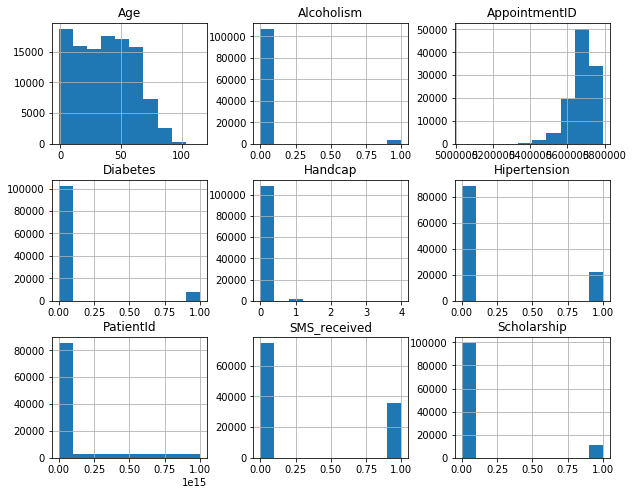

In [6]:
# check the diagrams in the dataset
df.hist(figsize = (10,8))

### Data Cleaning:  It seems that the histogram is not informative enough. next, I will drop the unnecessary columns before further analysis

### Drop unnecessary columns for this project:
> 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'

In [7]:
# All the columns 
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [8]:
# drop the columns
df.drop(['Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'],axis = 1, inplace = True)

In [9]:
# check if I drop the columns successfully
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'No-show'],
      dtype='object')

### Change the data of columns "ScheduledDay" and "AppointmentDay" to DateTime

In [10]:
# check some data in this column
df['ScheduledDay'].head()

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object

### I use apply() and lambda function to avoid repetitive code here

In [11]:
# we only want the date, so we delete everything starting from the letter "T"

df['ScheduledDay'].apply(lambda x: x.split("T")[0])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])


In [12]:
# we do the same thing to "AppointmentDay"

df['AppointmentDay'].apply(lambda x: x.split("T")[0])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

### Note: Since I have already executed two lines above, reexecute them will cause **error** 

In [13]:
# double check to ensure we change the data type for these two columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(3), object(3)
memory usage: 7.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: What is the relation between age and show up rate?

In [14]:
# explore age column
df.Age.head()

0    62
1    56
2    62
3     8
4    56
Name: Age, dtype: int64

In [15]:
# narrow down the range of age from 0 to 100
df = df[(df['Age']>=1) & (df['Age']<=100)]

In [16]:
# classify age into different group
df['Age_group'] = pd.cut(df['Age'],bins= [0,2,16,35,60,100], labels=['Baby','Children','Young Adult','Middle Age ','Old'])

In [17]:
# check if it works
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,No-show,Age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,No,Old
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,No,Middle Age


### Change "No-show" column from string to int

In [18]:
# 1 means patients showed up
df['No-show'] = df['No-show'].apply(lambda x : x.replace('No','1'))

# 0 means patients didn't show up
df['No-show'] = df['No-show'].apply(lambda x : x.replace('Yes','0'))



In [19]:
# change data type from string to int
df['No-show'] = df['No-show'].apply(lambda x :int(x))

### separete no-show = 1 and no-show = 0

In [20]:
# no-show = 1
showup = df[df['No-show']==1]

# check if it works
showup[showup['No-show']==0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,No-show,Age_group


In [21]:
# no-show = 0
noshowup = df[df['No-show']==0]

# check if it works
noshowup[noshowup['No-show']==1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,No-show,Age_group


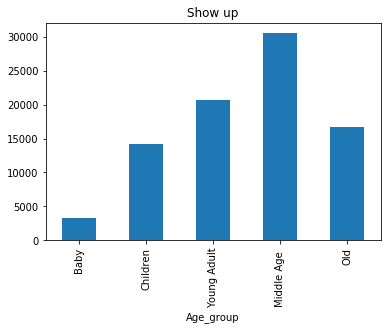

In [22]:
# age distribution of people who showed up
showup.groupby('Age_group')['PatientId'].count().plot(kind='bar',title='Show up')

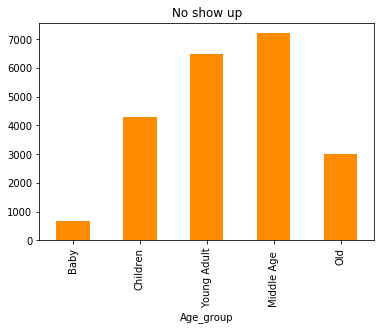

In [23]:
# age distribution of people who didn't showed up
noshowup.groupby('Age_group')['PatientId'].count().plot(kind='bar',title='No show up',color='darkorange')

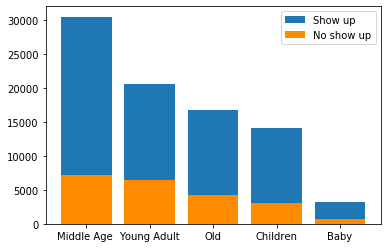

In [24]:
# combined graph :age distribution of people who showed up and didn't show up
ax = plt.subplot(111)
ax.bar(showup['Age_group'].value_counts().index, showup['Age_group'].value_counts())
ax.bar(showup['Age_group'].value_counts().index, noshowup['Age_group'].value_counts(),color='darkorange')
ax.legend(['Show up','No show up'])

### Research Question 1 Conclusion:
> The number of people showed up is much larger than the number of people didn't show up

> Middle-age adults( from 35- 60 ) are the group of people who made an appointment

> While the trend between show up graph and no show up graph is quite similar, young adults (16-35) have a relatively larger no show up rate.

### Research Question 2:Will people have scholarship have a higher show-up rate?

In [25]:
# classify people into two groups: have scholarship and don't have scholarship
scholarship = df[df['Scholarship']==1]
no_scholarship = df[df['Scholarship']==0]
no_scholarship.count()

PatientId         96171
AppointmentID     96171
Gender            96171
ScheduledDay      96171
AppointmentDay    96171
Age               96171
Neighbourhood     96171
Scholarship       96171
No-show           96171
Age_group         96171
dtype: int64

Text(0.5, 1.0, 'Show up rate with scholarship')

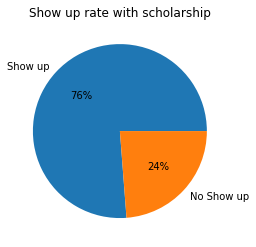

In [26]:
# the show up rate when you have a scholarship
showup_scholarship = scholarship['No-show'].mean()
nonshowup_scholarship = 1- showup_scholarship
plt.pie([showup_scholarship,nonshowup_scholarship],labels=['Show up','No Show up'],autopct='%1.0f%%')
plt.title('Show up rate with scholarship')

Text(0.5, 1.0, 'Show up rate WITHOUT scholarship')

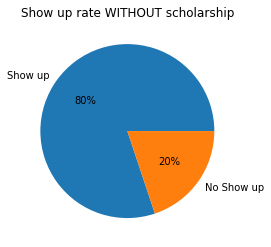

In [27]:
# the show up rate when you DON'T have scholarship
showup_noscholarship = no_scholarship['No-show'].mean()
nonshowup_noscholarship = 1- showup_noscholarship
plt.pie([showup_noscholarship,nonshowup_noscholarship],labels=['Show up','No Show up'],autopct='%1.0f%%')
plt.title('Show up rate WITHOUT scholarship')

### Research Question 2 Conclusion: 
> Even though scholarship offers financial aid for people, the show up rate for people with scholarship is similar to that of people without scholarship.

> I conclude that having scholarship cannot increase or decrease the show up rate.

### Research Question 3: What is the show up rate between male and female?

In [28]:
# to see the total number of people show up in the dataset
showup.count()

PatientId         85303
AppointmentID     85303
Gender            85303
ScheduledDay      85303
AppointmentDay    85303
Age               85303
Neighbourhood     85303
Scholarship       85303
No-show           85303
Age_group         85303
dtype: int64

In [29]:
# the percentage or chance when a female show up
female_chance = df.groupby(['Gender','No-show'])['PatientId'].count()['F'][1] / showup.count()[0]

In [30]:
# the percentage or chance when a male show up
male_chance = df.groupby(['Gender','No-show'])['No-show'].count()['M'][1] / showup.count()[0]

Text(0.5, 1.0, 'Show up rate between gender')

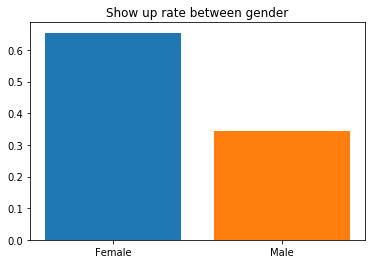

In [31]:
ax = plt.subplot()
plt.bar('Female',female_chance)
plt.bar('Male',male_chance)
plt.title('Show up rate between gender')

### Extra diagrams 

### Heat Map

In [32]:
#import squarify package for treemap
import squarify as sq

In [33]:
a = df.groupby('Age_group')['PatientId'].count()
num = [3891,18440,27133,37761,19755]
group = ['Baby','Children','Young Adult','Middle Age','Old']


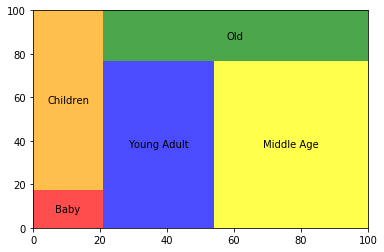

In [34]:
sq.plot(sizes = num,label = group,color = ['red','orange','blue','yellow','green'], alpha = 0.7)

### Stacked Bar Chart

In [35]:
# define x axis 
x = ('Scholarship','No Scholarship')

# find out the number of female have scholarship and don't have scholarship
fe_scholarship = df[(df['Gender']=='F') & (df['Scholarship']==1)].count()[0]
fe_no_scholarship = df[(df['Gender']=='F') & (df['Scholarship']==0)].count()[0]

# find out the number of male have scholarship and don't have scholarship
male_scholarship = df[(df['Gender']=='M') & (df['Scholarship']==1)].count()[0]
male_no_scholarship = df[(df['Gender']=='M') & (df['Scholarship']==0)].count()[0]


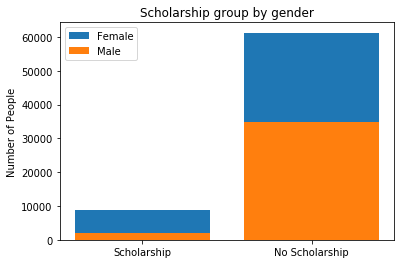

In [36]:
# plot stacked bar chart

p1 = plt.bar(x,[fe_scholarship,fe_no_scholarship])
p2= plt.bar(x,[male_scholarship,male_no_scholarship])
plt.ylabel('Number of People')
plt.title('Scholarship group by gender')
plt.legend(['Female','Male'])

### correlation matrix 

In [37]:
import seaborn as sns

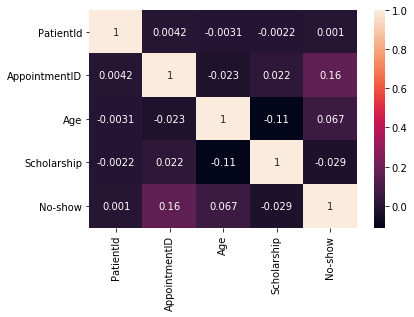

In [38]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

### Function to help me reuse my code

In [39]:
def parse_maybe_int(i):
    if i==' ':
        return None
    else:
        return int(i)

<a id='conclusions'></a>
## Conclusions



1. What is the relation between age and show up rate?
> A: Middle-aged adults are the largest grouop of people in the dataset; Young adults have the relatively largest non show up rate in the dataset

2. Will people have scholarship have a higher show-up rate?
> A: No, people have scholarship have similar show up rate to those don't have scholarship even though there are only a few people can obtain scholarship

3. What is the show up rate between male and female?
> If a person shows up, it is likely that the perso is a female as female has a higher show up rate.

### Limitations

> 1. While the neighbourhood (location) is specific, it might be better to categorize it into different districts or county. By doing this, we can then analyze the geographic relation with show up rate. For example, District A might have a higher show up rate because it is the closest district to the hospital

> 2. AppointmentDay only provides date but fails to provide specific time. If we can know the specific time of the appointment, we can analyze which time range would the patients show up the most?

> 3. it seems like patientId uses scientific notation which is hard to remember and categorize